<a href="https://colab.research.google.com/github/hubertrykala93/eye-diseases-image-classification/blob/main/eye_diseases_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import keras

from keras_preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [13]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use(style='fivethirtyeight')

# Collecting Data and Remove Unnecessary Files

In [2]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download --force -d gunavenkatdoddi/eye-diseases-classification

Saving kaggle.json to kaggle.json
 98% 720M/736M [00:03<00:00, 209MB/s]
100% 736M/736M [00:03<00:00, 218MB/s]


In [3]:
!unzip -q eye-diseases-classification.zip
!rm rf eye-diseases-classification.zip

rm: cannot remove 'rf': No such file or directory


In [4]:
os.rename(src='/content/dataset', dst='/content/files')

# Images Exploration

In [7]:
BASE_DIR = '/content/files'
DATASET_DIR = '/content/dataset'

if not os.path.exists(DATASET_DIR):
  os.mkdir(path=DATASET_DIR)

In [35]:
def show_images(kind: str, id: int = 0, random_choice: bool = False,
                make_subplots: bool = False) -> None:
    """
    Show image from file directories.

    Parameters:
    ----------
    kind: str
      Must be in 'cataract', 'diabetic_retinopathy', 'glaucoma' or normal'.

    id: int
      Index of image, while index will be higher the length of files in directory
      then will raise error.

    random_choice: bool
      If random_choice is True, function choose random image and return it.

    make_subplots: bool
      If make_subplots is True, function choose 12 random images
      and return subplots from this images.

    Returns:
    -------
    matplotlib.pyplot.Axes
    """

    filenames = dict(enumerate(os.listdir(path=os.path.join(BASE_DIR, kind))))

    if id >= len(filenames):
        raise KeyError(f'Wrong index, maximum index is {len(filenames)}.')
    else:
        if not make_subplots:
            if random_choice == False:
                img = load_img(path=os.path.join(BASE_DIR, kind, filenames[id]), target_size=(150, 150))
                X = img_to_array(img=img).astype(dtype=np.uint8)

                plt.imshow(X=X, cmap='gray_r', vmin=0, vmax=255)
                plt.title(label=filenames[id])
                plt.axis('off')
                plt.grid(visible=False)

                plt.show()

            else:
                random_id = filenames[np.random.choice(a=len(filenames))]

                img = load_img(path=os.path.join(BASE_DIR, kind, random_id), target_size=(150, 150))
                X = img_to_array(img=img).astype(dtype=np.uint8)

                plt.imshow(X=X, cmap='gray_r', vmin=0, vmax=255)
                plt.title(label=random_id)
                plt.axis('off')
                plt.grid(visible=False)

                plt.show()

        else:
            indexes = []

            while len(indexes) != 12:
                indexes = list(indexes)
                indexes.append(np.random.choice(a=len(filenames)))

                indexes = set(indexes)

            indexes = list(indexes)

            for i, index in enumerate(indexes):
                plt.subplot(4, 3, i + 1)

                img = load_img(path=os.path.join(BASE_DIR, kind, filenames[index]), target_size=(150, 150))
                X = img_to_array(img=img).astype(dtype=np.uint8)

                plt.imshow(X=X, cmap='gray_r', vmin=0, vmax=255)
                plt.title(label=filenames[index], fontdict={
                    'size': 10
                })
                plt.axis('off')
                plt.grid(visible=False)

            plt.show()

Cataract

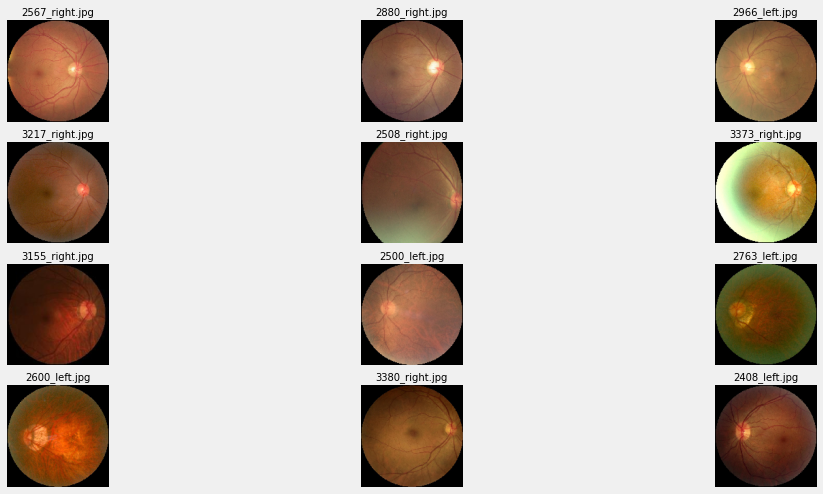

In [36]:
show_images(kind='cataract', id=990, random_choice=False, make_subplots=True)

Diabetic Retinopathy

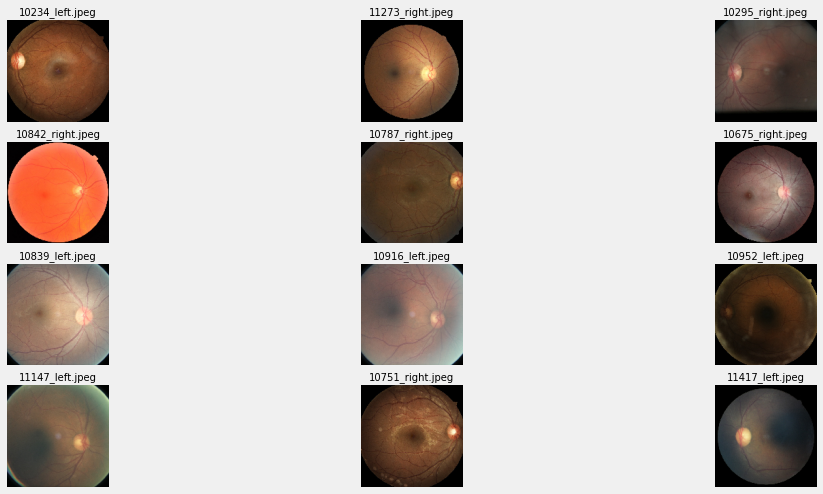

In [37]:
show_images(kind='diabetic_retinopathy', id=990, random_choice=False, make_subplots=True)

Glaucoma

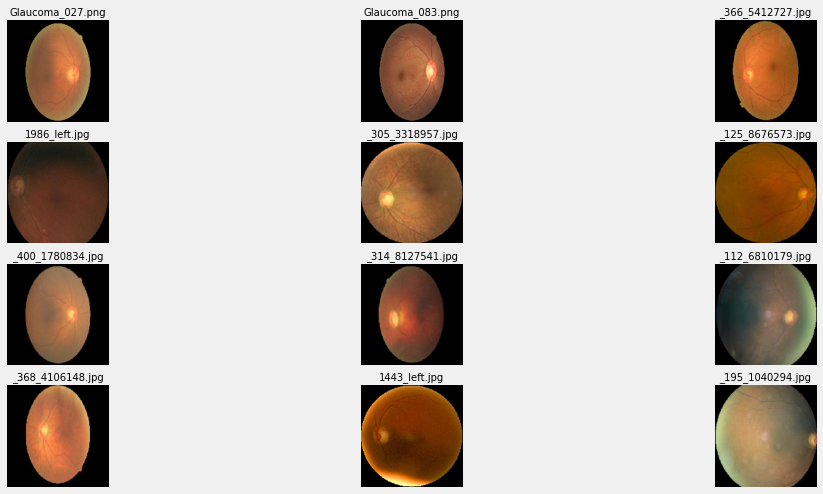

In [38]:
show_images(kind='glaucoma', id=990, random_choice=False, make_subplots=True)

Normal

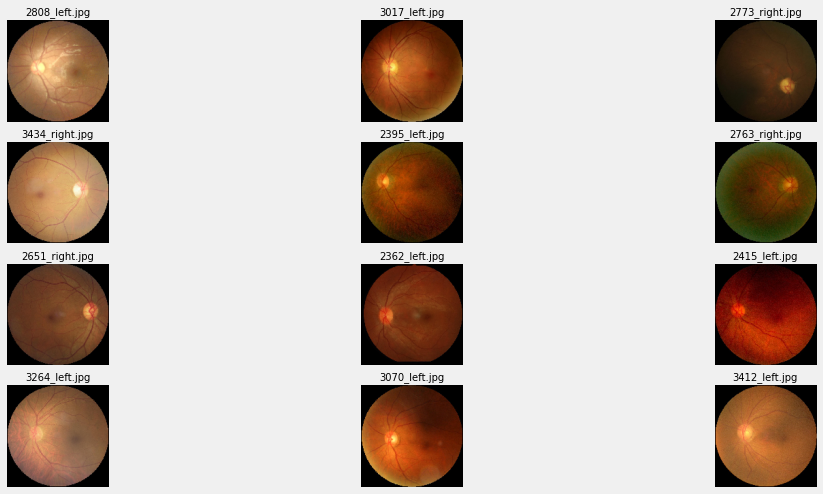

In [39]:
show_images(kind='normal', id=990, random_choice=False, make_subplots=True)

# Creating Dataset with Train, Valid and Test Files